In [1]:
import numpy as np
import tensorflow as tf

# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors 

import ipysh

%aimport models.base

import Hunch_utils  as Htls
import Hunch_lsplot as Hplt
import Hunch_tSNEplot as Hsne

%aimport models.AEFIT4
%aimport models.AEFIT5
%aimport models.CAEFIT

# ipysh.Bootstrap_support.debug()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Hunch models imported
reload set for module  Hunch_utils
reload set for module  Dummy_g1data
reload set for module  Hunch_lsplot
reload set for module  Hunch_tSNEplot


# TRY AEFIT5 on DUMMY

In [ ]:
import Dummy_g1data as dummy
du = dummy.Dummy_g1data(counts=40000, size=15).buffer()
du.kinds

In [ ]:
m = models.AEFIT5.AEFIT5(latent_dim=2, feature_dim=30,  dprate=0., scale=1, geometry=[],beta=0.01)
m.inference_net.summary()

In [ ]:
l = m.inference_net.get_layer('dense_28')
l.kernel

In [ ]:
p = Hplt.LSPlotBokeh()
p.set_model(m)
p.set_data(du, counts=1000)
p.plot(notebook_url='http://172.17.0.2:8888')

In [ ]:
models.base.train_thread(m, du, batch=100, epoch=6, learning_rate=1e-3, callbacks=[]).control_panel()

In [ ]:
# [ v.name for v in h2.trainable_variables ]
def plot(xy):
    plt.figure('data')
    axes = plt.gca()
    # axes.set_xlim([xmin,xmax])
    axes.set_ylim([0,1.2])
    x,y = tf.split(xy[0], num_or_size_splits=2)
    plt.plot(x,y,'.')
d = [x for x in du.ds_array.shuffle(100).batch(1).take(100)][0]
d0 = d[0]
y0 = m(d[0], training=False)
y0 = tf.sigmoid(y0)
plot(d0)
plot(y0)



# TRY AEFIT5 on QSH2

In [2]:
import Dataset_QSH
qsh = Dataset_QSH.Dataset_QSH()
import os
file = ipysh.abs_builddir+'/te_db_r15.npy'
if os.path.isfile(file):
    qsh.load(file)
else:
    qsh.load(ipysh.abs_builddir+'/te_db_2.npy')
    qsh.rebalance_prel(15)
    qsh.save(ipysh.abs_builddir+'/te_db_r15.npy')
    
qsh.shuffle()
qsh.clean_up_poorcurves(5)
qsh.dim = 15
qsh.set_null(np.nan)
qsh.set_normal_positive()
qsh.unbias_mean(0.5, 'te')
qsh.set_normal_positive(['te'])
qsh.clip_values(0.1,0.6)
qsh.set_normal_positive(['te'])

print("QSH rebalanced 15 points size: ", len(qsh))

QSH rebalanced 15 points size:  47567


W0827 11:47:25.153876 140077181724480 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:504: py_func (from tensorflow.python.ops.script_ops) is deprecated and will be removed in a future version.
Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


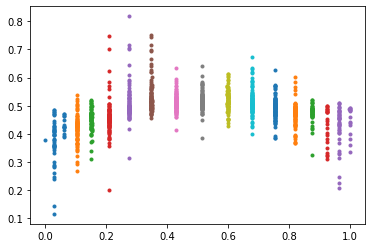

In [3]:
plt.figure('test')
x,y,_ = [x for x in qsh.ds_tuple.batch(100).take(1)][0]
plt.plot(x,y,'.');

In [28]:
m2 = models.AEFIT5.AEFIT5(latent_dim=2, feature_dim=30,  dprate=0., scale=2, geometry=[20,20,10,10], beta=0.)

AEFIT5 ready:


In [30]:
m2.train_thread(qsh, batch=100).control_panel()

EPOCH:  0
test loss:  18.5968277227 
EPOCH:  1


In [31]:
p = Hplt.LSPlotBokeh()
p.set_model(m2)
p.set_data(qsh, counts=1000)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

In [4]:
m = models.AEFIT5.AEFIT5(latent_dim=10, feature_dim=30,  dprate=0., scale=2, geometry=[20,20,10,10], beta=0.) #beta=0.001)

AEFIT5 ready:


In [24]:
# m.save('step10_qsh_fit5_l10')
m.load('step10_qsh_fit5_l10')

In [27]:
p = Hplt.LSPlotBokeh()
p.set_model(m)
# p.set_data(du, counts=1000)
p.set_data(qsh, counts=1000)
p.plot(notebook_url='http://172.17.0.2:8888')

Loading BokehJS ...

E0827 13:08:56.317301 140077181724480 ioloop.py:638] Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x7f65cb1dab70>, <tornado.concurrent.Future object at 0x7f65cb223f28>)
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/usr/lib/python3/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/tornado/ioloop.py", line 626, in _discard_future_result
    future.result()
  File "/usr/lib/python3/dist-packages/tornado/concurrent.py", line 238, in result
    raise_exc_info(self._exc_info)
  File "<string>", line 4, in raise_exc_info
  File "/usr/lib/python3/dist-packages/tornado/gen.py", line 1069, in run
    yielded = self.gen.send(value)
  File "/home/andrea/devel/rfx/rfx-hunch/build/conf/python/site-packages/lib/python3.6/site-packages/bokeh/server/session.py", line 70, in _need

In [5]:
models.base.train_thread(m, qsh, batch=100, epoch=12, learning_rate=1e-3, callbacks=[]).control_panel()
# models.base.train_thread(m, du, batch=100, epoch=6, learning_rate=1e-3, callbacks=[]).control_panel()

Epoch 1/12


W0827 11:47:51.672619 140075476231936 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:182: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


475/475 [==============================] - 22s 46ms/step - loss: 18.5778 - accuracy: 0.9451
Epoch 2/12
475/475 [==============================] - 19s 41ms/step - loss: 18.5194 - accuracy: 0.9903
Epoch 3/12
475/475 [==============================] - 20s 42ms/step - loss: 18.5101 - accuracy: 0.9927
Epoch 4/12
475/475 [==============================] - 19s 41ms/step - loss: 18.5057 - accuracy: 0.9934
Epoch 5/12
475/475 [==============================] - 19s 41ms/step - loss: 18.5038 - accuracy: 0.9943
Epoch 6/12
475/475 [==============================] - 21s 44ms/step - loss: 18.5019 - accuracy: 0.9950
Epoch 7/12
475/475 [==============================] - 22s 45ms/step - loss: 18.5010 - accuracy: 0.9957
Epoch 8/12
475/475 [==============================] - 20s 42ms/step - loss: 18.5004 - accuracy: 0.9959
Epoch 9/12
475/475 [==============================] - 20s 42ms/step - loss: 18.4998 - accuracy: 0.9959
Epoch 10/12
475/475 [==============================] - 20s 41ms/step - loss: 18.4994

In [6]:
qsh_pos = 0

16


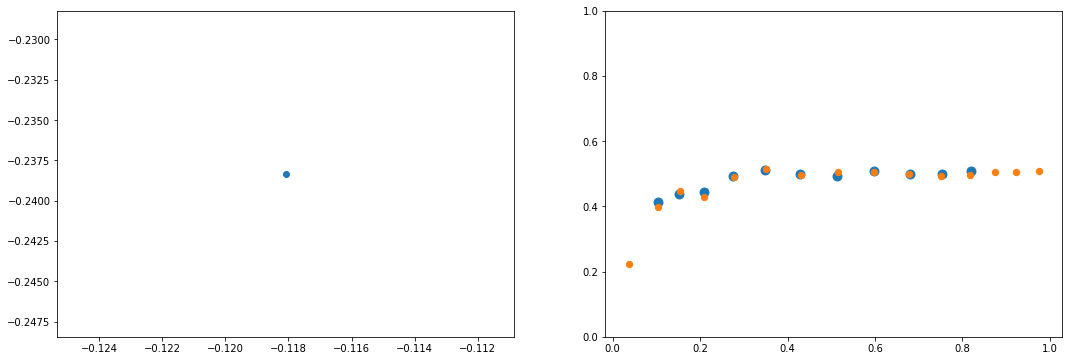

In [25]:
fig = plt.figure('test_curve',figsize=(18, 6))
plt.clf()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)    
# ax1.set_xlim(-2.,2.)
ax2.set_ylim(0.,1.)


for xy in qsh.ds_array.skip(qsh_pos).batch(1).take(1):    
    xy,_ = xy
    x,y = tf.split(xy,2, axis=1)
    ax2.scatter(x,y,s=80)
    me,_  = m.encode(xy, training=False)
    gpt = me[0].numpy()
    ax1.scatter(gpt[0],gpt[1])
    
    XY = m.decode(me,apply_sigmoid=True, training=False)
    X,Y = tf.split(XY[0], 2)
    X,Y = (X.numpy(), Y.numpy())
    ax2.scatter(X,Y,s=40)

print(qsh_pos)    
qsh_pos += 1